## Final Lesson - Introduction to Machine Learning

This lesson is dedicated solely to Machine Learning. What is Machine Learning? According to Wikipedia, [Machine Learning](https://en.wikipedia.org/wiki/Machine_learning) is the scientific study of algorithms and statistical models that computer systems use in order to perform a specific task effectively without using explicit instructions, relying on patterns and inference instead.

### Types of Machine Learning problems
Typically, there are 2 kinds of machine learning problems: Supervised and Unsupervised (there is actually a third field called Reinforcement Learning, but that's not the subject of focus):

From Wikipedia:

    Supervised learning is the machine learning task of learning a function that maps an input to an output based 
    on example input-output pairs
    
    Unsupervised learning is a type of self-organized Hebbian learning that helps find previously unknown patterns 
    in data set without pre-existing labels.

We will only be going through Supervised Learning problems in this lesson. That is, we are given something to predict, and we have some features that we can use to generate predictions.

In the field of supervised learning problems, there are 3 subfields:

1. Classification problems - In classification problems, we are given a category to predict. Examples of such questions are: is this picture a cat, a dog, or a rabbit? Is the person going to default on his loan? Given an image, predict what number it is.

2. Regression problems - In regression problems, our algorithm outputs a real-valued number. Examples of such problems are: predict the price of this house, or predict GDP growth levels next year.

### On Machine Learning vs Econometrics
A better question is, how does Machine Learning differ from traditional Econometrics? According to econometrician [Francis X. Diebold](https://fxdiebold.blogspot.com/2016/10/machine-learning-vs-econometrics-i.html), Machine learning is almost always centered on prediction; think "ŷ ", while Econometrics (E) is often, but not always, centered on prediction. Instead it's also often interested on estimation and associated inference; think "β̂ ". Nowadays, however, the difference between the two fields seem more minute, and ML is attempting to provide answers to questions previously reserved for Econometrics.

#### Disclaimer
By no means is this a full treatment of Machine Learning; this is a gentle introduction into the wide field. For a deeper understanding of Machine Learning, online training courses hosted by Coursera and Codeacademy are recommended. In fact, this iPython notebook is derived of 3 primary components:

1. Data Manipulation, Processing and Cleaning
2. Feature Generation
3. Machine Learning

For the machine learning aspect, we will be learning two different algorithms on how to classify categorical problems. Finally, we will give some intuition into how Neural Networks work, as well as other training problems for you to work on in your free time to gain a better understanding of the other ML algorithms.

#### Case-Study approach

In this lesson, we will not be going through the different kinds of algorithms used by Data Scientists; there are way too many algorithms. Instead, the focus will be on the important aspects before we apply the algorithms: 

1. Data Manipulation, Processing and Cleaning 
2. Imputing Missing Data
3. Feature Generation

The first and second section relies on much that we have learnt in lesson 3 on data manipulation, while the last section relies much on the 4th lesson. Without further ado, let's apply our understanding on the Titanic dataset.

##### Training vs Testing
In Machine Learning problems, we are typically given a training set (for us to train our algorithms), which contains the variable we are interested in, and a test set (to evaluate our predictions). Typically, the problem will include a metric for basis of comparison. 

##### Evaluation Metric
For classification problems, it could be accuracy (how many test observations did you correctly predict). For regression problems, it could be RMSE (root mean-squared error).

For the [Titanic problem listed on Kaggle](https://www.kaggle.com/c/titanic/overview/evaluation), they will be using "Accuracy" as the evaluation metric.

### Preliminary Data Exploration

In this section, we import key libraries and read the training and test data into Python. We look at summary statistics to get a better understanding of what we are currently dealing with.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def read_and_combine_data(train_filepath, test_filepath):
    train = pd.read_csv(train_filepath, index_col=0)
    test = pd.read_csv(test_filepath, index_col=0)
    
    combine = pd.concat([train, test], sort=True)
    return combine

train_filepath = 'data/titanic/train.csv'
test_filepath = 'data/titanic/test.csv'

train = pd.read_csv(train_filepath, index_col=0)
test = pd.read_csv(test_filepath, index_col=0)
combine = read_and_combine_data(train_filepath, test_filepath)

In [13]:
combine.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,N,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
3,26.0,N,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
5,35.0,N,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


In [49]:
combine.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309,1309.000000,891.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Connolly, Miss. Kate",NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,2.294882,NaN,0.498854,0.383838,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,0.837836,NaN,1.041658,0.486592,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,0.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,2.000000,NaN,0.000000,0.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,3.000000,NaN,1.000000,1.000000,NaN


### Imputing Missing Data

In our case, we are tasked to predict whether a passenger survived based on the features in the model. However, some of these features are not as useful as others, and we can generate new features using a combination of different features. Before we do that however, we check for missing data.

In [50]:
np.sum(pd.isnull(combine))

Age          263
Cabin       1014
Embarked       2
Fare           1
Name           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived     418
Ticket         0
dtype: int64

We note that there are quite a significant number of observations with missing data. To circumvent this, we can create a new column for the "Cabin" variable, to indicate that the data are missing. For the "Embarked" and "Fare" feature, we can impute the most popular embarkation point and the average fare.

In [9]:
combine.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [10]:
combine.Fare.mean()

33.2954792813456

In [11]:
def impute_missing_cabins():
    return combine.Cabin.fillna("N", inplace=True)

def impute_missing_embarkation_point():
    return combine.Embarked.fillna("S", inplace=True)

def impute_missing_fare():
    return combine.Fare.fillna(combine.Fare.mean(), inplace=True)

impute_missing_cabins()
impute_missing_embarkation_point()
impute_missing_fare()

In [54]:
np.sum(pd.isnull(combine))

Age         263
Cabin         0
Embarked      0
Fare          0
Name          0
Parch         0
Pclass        0
Sex           0
SibSp         0
Survived    418
Ticket        0
dtype: int64

We are left with the age variable. There are a few ways to resolve this issue:

1. Drop the age variable.
2. Impute the missing ages with the average age of the dataset
3. Use conditional information to determine the missing age

Of the 3, the third way is the hardest - we will do the third way. 

We first split the Name column into First and Last Name, bearing in mind that the designation of the passenger may contain some important information on the age of the passenger.

In [21]:
def get_desg_first_name(name):
    return name.split(", ")[1]

def get_first_name():
    first_name = combine.Name.apply(lambda x: get_desg_first_name(x))
    combine['FirstName'] = first_name.apply(lambda x: x.split(". ")[1])
    combine['Designation'] = first_name.apply(lambda x: x.split(". ")[0])
    return combine
    
def get_last_name():
    combine['LastName'] = combine.Name.apply(lambda x: x.split(", ")[0])
    return combine

get_last_name()
get_first_name()
print('')

In [22]:
combine.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,LastName,FirstName,Designation
PassengerId,,,,,,,,,,,,,,
1,22.0,N,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171,Braund,Owen Harris,Mr
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599,Cumings,John Bradley (Florence Briggs Thayer),Mrs
3,26.0,N,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282,Heikkinen,Laina,Miss
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803,Futrelle,Jacques Heath (Lily May Peel),Mrs
5,35.0,N,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450,Allen,William Henry,Mr


Note that the column, "Designation" can be used to impute missing data for the "Age" variable. Suppose we have a missing data with the designation, "Miss". We can look at the mean value for all observations with the same designation and impute that as the missing value.

In [57]:
combine.groupby("Designation")['Age'].mean()

Designation
Capt            70.000000
Col             54.000000
Don             40.000000
Dona            39.000000
Dr              43.571429
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           5.482642
Miss            21.774238
Mlle            24.000000
Mme             24.000000
Mr              32.252151
Mrs             36.994118
Ms              28.000000
Rev             41.250000
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64

In [23]:
combine.groupby("Designation").size()

Designation
Capt              1
Col               4
Don               1
Dona              1
Dr                8
Jonkheer          1
Lady              1
Major             2
Master           61
Miss            260
Mlle              2
Mme               1
Mr              757
Mrs             197
Ms                2
Rev               8
Sir               1
the Countess      1
dtype: int64

In [31]:
combine.Designation[:20]

PassengerId
1         Mr
2        Mrs
3       Miss
4        Mrs
5         Mr
6         Mr
7         Mr
8     Master
9        Mrs
10       Mrs
11      Miss
12      Miss
13        Mr
14        Mr
15      Miss
16       Mrs
17    Master
18        Mr
19       Mrs
20       Mrs
Name: Designation, dtype: object

In [32]:
def impute_missing_age():
    '''
    Generate a pd.Series using information on Designation to impute missing age data
    '''
    age_list = []
    for age, desg in zip(combine.Age, combine.Designation):
        if pd.isnull(age):
            age_list.append(combine.groupby("Designation")['Age'].mean()[desg])
        else: age_list.append(age)
    return age_list

combine['NewAge'] = impute_missing_age()

We check for missing data once again. If everything turns out to be fine, we can begin to explore the relationships inherent in the data.

In [34]:
np.sum(pd.isnull(combine))

Age            263
Cabin            0
Embarked         0
Fare             0
Name             0
Parch            0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
LastName         0
FirstName        0
Designation      0
NewAge           0
dtype: int64

### Data Exploration and Plotting
Everything seems good. We can proceed with data exploration using plots. We begin with some hypotheses that we are interested in, and see what that leads to. Here are some possible hypotheses one may be interested in testing:

1. Age is correlated with Survival Rate
2. Fare is correlated with Survival Rate
3. Designation is correlated with Survival Rate

From there, we can generate additional hypotheses: can an interaction term between Gender x Age lead to even better results? 

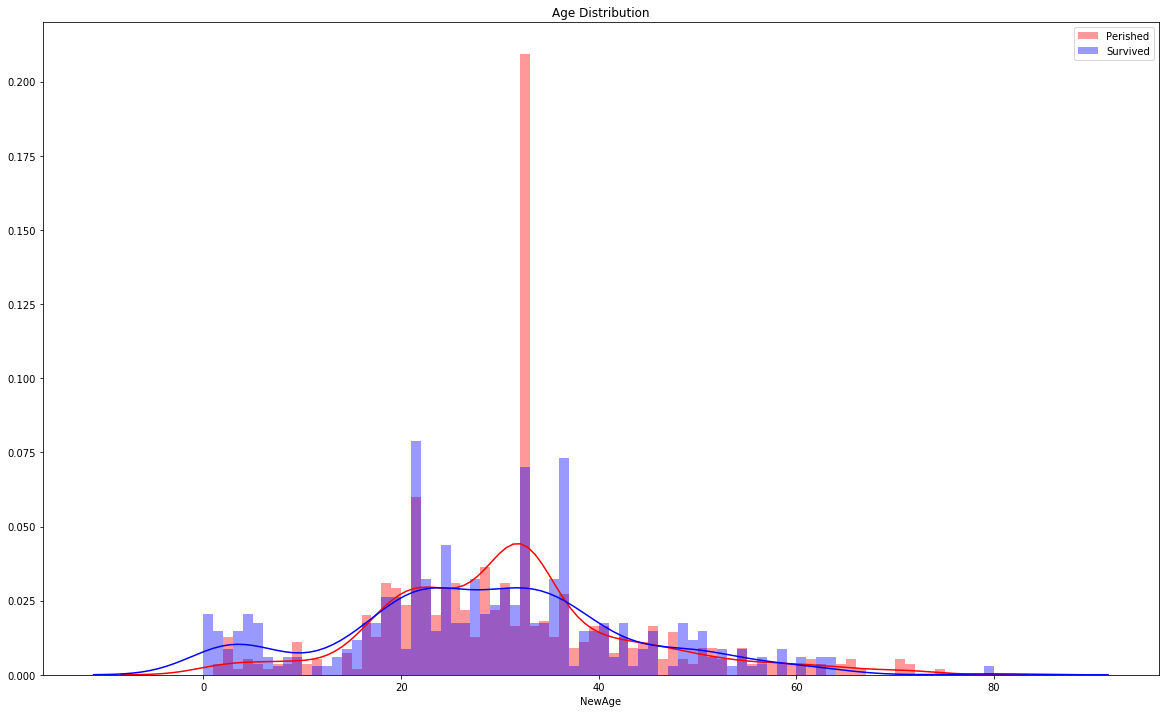

In [35]:
### Hypothesis 1
plt.figure(figsize=(20, 12))
sns.distplot(combine[combine.Survived == 0].NewAge, bins=range(0, 81, 1), color = 'red', label='Perished')
sns.distplot(combine[combine.Survived == 1].NewAge, bins=range(0, 81, 1), color = 'blue', label='Survived')
plt.legend(loc='upper right')
plt.title("Age Distribution")
plt.show()

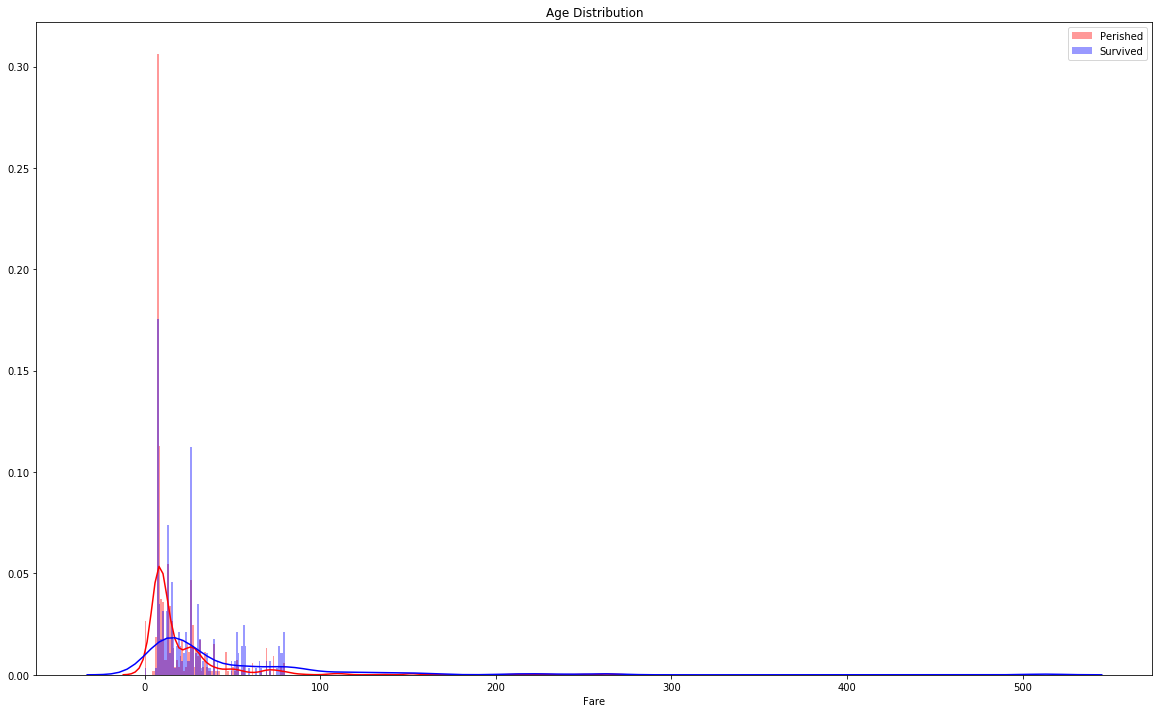

In [62]:
### Hypothesis 2
plt.figure(figsize=(20, 12))
sns.distplot(combine[combine.Survived == 0].Fare, bins=range(0, 81, 1), color = 'red', label='Perished')
sns.distplot(combine[combine.Survived == 1].Fare, bins=range(0, 81, 1), color = 'blue', label='Survived')
plt.legend(loc='upper right')
plt.title("Age Distribution")
plt.show()

From the graphs above, it appears that passengers who are young tend to survive the Titanic crash. In addition, passengers who paid more for their fare tended to have a higher rate of survival. However, something stands out. There appears to be anomaly in the dataset - some passengers paid way more than \$100 for their fare.

We **may** need to conduct a secondary analysis to ensure that this is indeed an anomaly.

---

Let's test the third hypothesis.

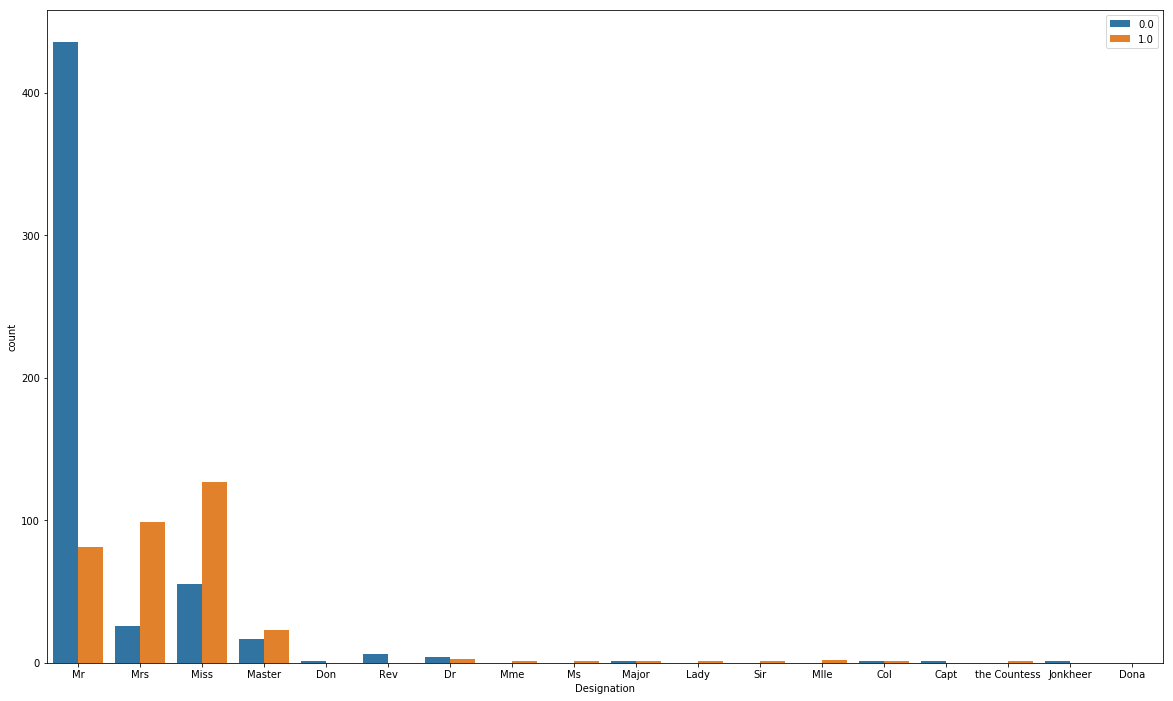

In [63]:
### Hypothesis 3
plt.figure(figsize=(20, 12))
sns.countplot("Designation", hue='Survived', data=combine)
plt.legend(loc='upper right')
plt.show()

The above plot seems to imply the following:

1. Male passengers have a relatively low survival rate, compared to females
2. Children tend to have a relatively high survival rate (their Designation is Master) 
3. There is not enough data about the other Designations to draw a decisive conclusion

---

Other hypotheses that we can carry out are as follows:

1. Could the feature Ticket be correlated with the Survival Variable?
2. Are passengers with Siblings/Spouses and Parents/Children more likely to survive than passengers travelling alone?

In [41]:
len(np.unique(combine.Ticket))

929

In [42]:
len(combine.Ticket)

1309

We note that there are 929 unique value for tickets, but there are 1309 entries. Some passengers might be sharing tickets! To determine how many people are sharing tickets, we can use the DataFrame method, `groupby`. This can be done using the following function:

In [44]:
combine.groupby('Ticket').size()

Ticket
110152               3
110413               3
110465               2
110469               1
110489               1
110564               1
110813               2
111163               1
111240               1
111320               1
111361               2
111369               1
111426               1
111427               1
111428               1
112050               1
112051               1
112052               1
112053               1
112058               2
112059               1
112277               1
112377               1
112378               2
112379               1
112901               1
113028               1
113038               1
113043               1
113044               1
                    ..
STON/O 2. 3101273    1
STON/O 2. 3101274    1
STON/O 2. 3101275    1
STON/O 2. 3101280    1
STON/O 2. 3101285    1
STON/O 2. 3101286    1
STON/O 2. 3101288    1
STON/O 2. 3101289    1
STON/O 2. 3101291    1
STON/O 2. 3101292    1
STON/O 2. 3101293    1
STON/O 2. 3101294    1
STON

We note that there are 3 people sharing the same ticket, "110152". The following function returns the number of passengers holding the same ticket owned by the passenger (it's quite a difficult function to understand):

In [50]:
combine.groupby('Ticket')['Name'].transform("count").head()

PassengerId
1    1
2    2
3    1
4    2
5    1
Name: Name, dtype: int64

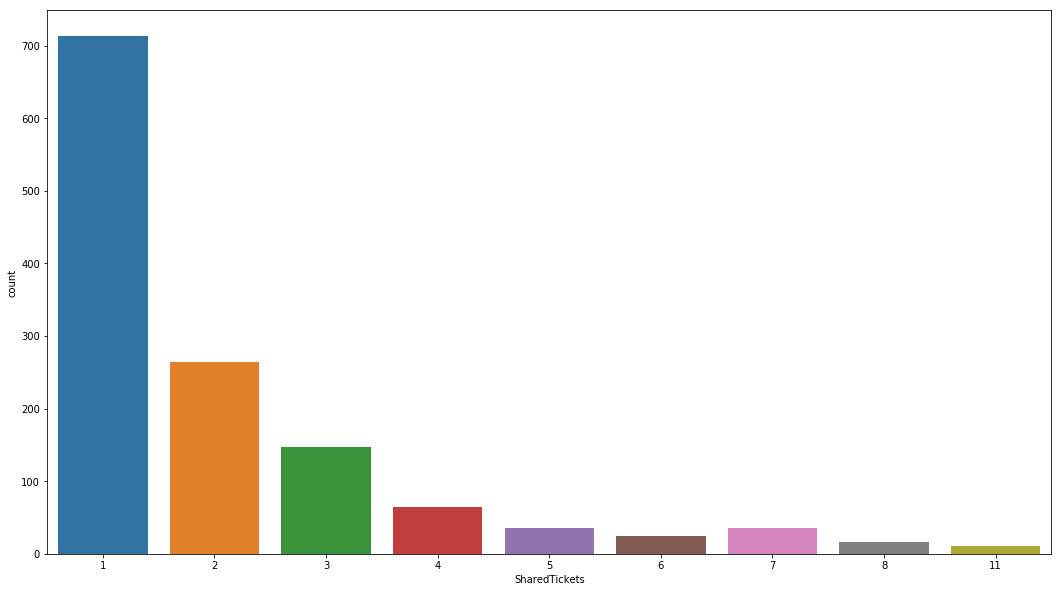

In [51]:
combine['SharedTickets'] = combine.groupby('Ticket')['Name'].transform("count")

plt.figure(figsize=(18, 10))
sns.countplot(combine.SharedTickets)
plt.show()

Are passengers who share tickets more or less likely to perish? To find out, we can use the `sns.distplot` function to find out.

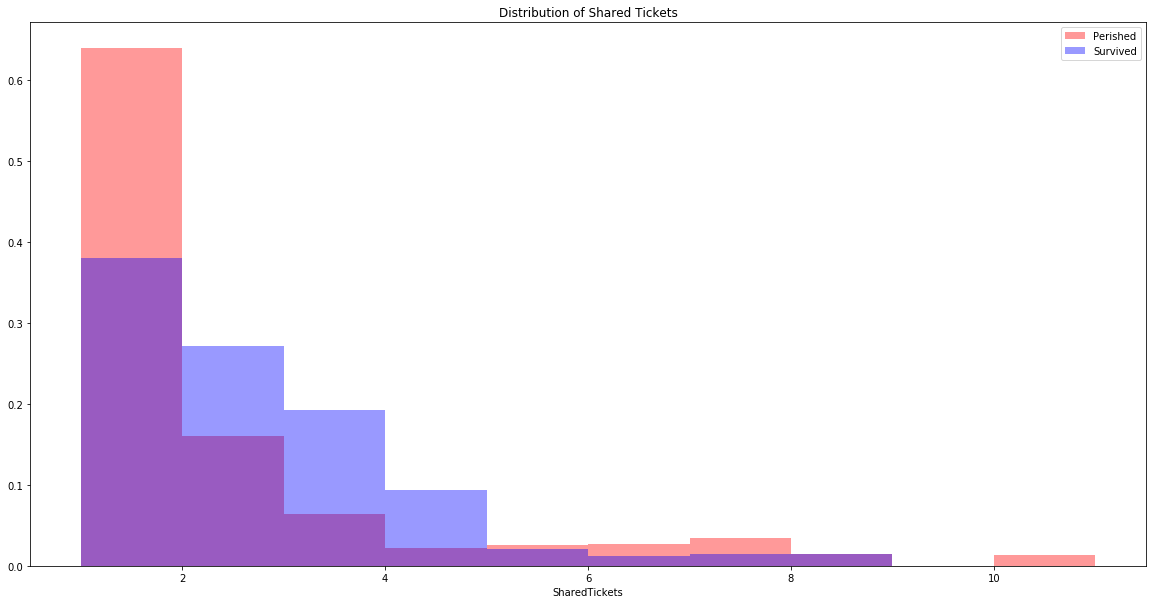

In [52]:
plt.figure(figsize=(20, 10))

sns.distplot(combine[(combine.Survived == 0)].SharedTickets.dropna(),
             bins = range(1, 12, 1), kde = False, norm_hist = True, color = 'red', label='Perished')

sns.distplot(combine[(combine.Survived == 1)].SharedTickets.dropna(),
             bins = range(1, 12, 1), kde = False, norm_hist = True, color = 'blue', label='Survived')

plt.legend(loc='upper right')
plt.title('Distribution of Shared Tickets')
plt.show()

It appears that passengers who shared tickets with 1, 2 or 3 other friends or relative had a higher chance of survival. To capture this, we can create a new feature called "GoodSharedTicket". In addition, we can also create a new column called, "Alone".

In [68]:
combine['GoodSharedTickets'] = ((combine.SharedTickets >= 2) & (combine.SharedTickets <= 4))
combine['Alone'] = combine.SharedTickets == 1

In [69]:
combine.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,...,LastName,FirstName,Designation,NewAge,SharedTickets,NormalisedFare,CabinType,NoCabin,GoodSharedTickets,Alone
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,22.0,N,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,...,Braund,Owen Harris,Mr,22.0,1,7.25000,N,0,False,True
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,...,Cumings,John Bradley (Florence Briggs Thayer),Mrs,38.0,2,35.64165,C,1,True,False
3,26.0,N,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,...,Heikkinen,Laina,Miss,26.0,1,7.92500,N,0,False,True
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,...,Futrelle,Jacques Heath (Lily May Peel),Mrs,35.0,2,26.55000,C,1,True,False
5,35.0,N,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,...,Allen,William Henry,Mr,35.0,1,8.05000,N,0,False,True


Recall that we had tickets costing more than \$500. Let's take a closer look at those tickets.

In [70]:
combine[combine.Fare >= 500]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,...,LastName,FirstName,Designation,NewAge,SharedTickets,NormalisedFare,CabinType,NoCabin,GoodSharedTickets,Alone
PassengerId,,,,,,,,,,,,,,,,,,,,,
259,35.0,N,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1.0,...,Ward,Anna,Miss,35.0,4,128.0823,N,0,True,False
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1.0,...,Cardeza,Thomas Drake Martinez,Mr,36.0,4,128.0823,B,3,True,False
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1.0,...,Lesurer,Gustave J,Mr,35.0,4,128.0823,B,1,True,False
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,NaN,...,Cardeza,James Warburton Martinez (Charlotte Wardle Drake),Mrs,58.0,4,128.0823,B,3,True,False


There is something similar across all ticket-holders; they all share the same ticket! One theory might be that the ticket fare, \$512.3292, might reflect the joint total instead of the fare each person paid. If we believe this to be true, we can simply create a new fare column by using the fare to divide by the number of people that shared the same ticket.

In [71]:
combine['NormalisedFare'] = combine.Fare / combine.SharedTickets

In [72]:
print('Max Fare is %f' % max(combine.Fare))
print('Max Normalised Fare is %f' % max(combine.NormalisedFare))

Max Fare is 512.329200
Max Normalised Fare is 128.082300


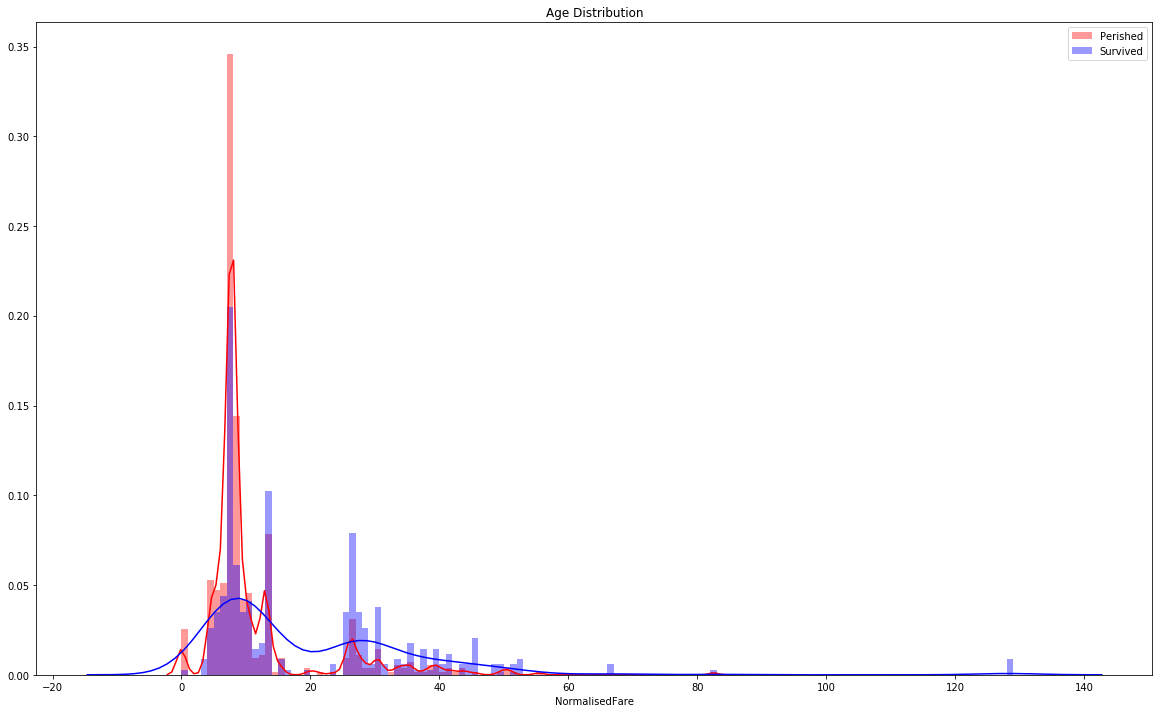

In [73]:
### Hypothesis 2
plt.figure(figsize=(20, 12))
sns.distplot(combine[combine.Survived == 0].NormalisedFare, bins=range(0, 131, 1), color = 'red', label='Perished')
sns.distplot(combine[combine.Survived == 1].NormalisedFare, bins=range(0, 131, 1), color = 'blue', label='Survived')
plt.legend(loc='upper right')
plt.title("Age Distribution")
plt.show()

All in all, the observation that passengers who paid higher fares has a higher rate of survival still stands. Now that we have generated some features, we can proceed to develop a Machine Learning algorithm.

---

#### Investing the Cabin Variable

Finally, we investigate the cabin variable, and check whether we are able to generate any new features from it.

In [74]:
np.unique(combine.Cabin)

array(['A10', 'A11', 'A14', 'A16', 'A18', 'A19', 'A20', 'A21', 'A23',
       'A24', 'A26', 'A29', 'A31', 'A32', 'A34', 'A36', 'A5', 'A6', 'A7',
       'A9', 'B10', 'B101', 'B102', 'B11', 'B18', 'B19', 'B20', 'B22',
       'B24', 'B26', 'B28', 'B3', 'B30', 'B35', 'B36', 'B37', 'B38',
       'B39', 'B4', 'B41', 'B42', 'B45', 'B49', 'B5', 'B50',
       'B51 B53 B55', 'B52 B54 B56', 'B57 B59 B63 B66', 'B58 B60', 'B61',
       'B69', 'B71', 'B73', 'B77', 'B78', 'B79', 'B80', 'B82 B84', 'B86',
       'B94', 'B96 B98', 'C101', 'C103', 'C104', 'C105', 'C106', 'C110',
       'C111', 'C116', 'C118', 'C123', 'C124', 'C125', 'C126', 'C128',
       'C130', 'C132', 'C148', 'C2', 'C22 C26', 'C23 C25 C27', 'C28',
       'C30', 'C31', 'C32', 'C39', 'C45', 'C46', 'C47', 'C49', 'C50',
       'C51', 'C52', 'C53', 'C54', 'C55 C57', 'C6', 'C62 C64', 'C65',
       'C68', 'C7', 'C70', 'C78', 'C80', 'C82', 'C83', 'C85', 'C86',
       'C87', 'C89', 'C90', 'C91', 'C92', 'C93', 'C95', 'C97', 'C99', 'D',
       'D

We note that there are many different types of cabins, and some passengers "share" cabins with other passengers. To capture these effects, we can create a new column, "CabinType", using the first character of the Cabin feature, and another, "NoCabin" to capture the number of cabins.

/Users/ngbolin/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


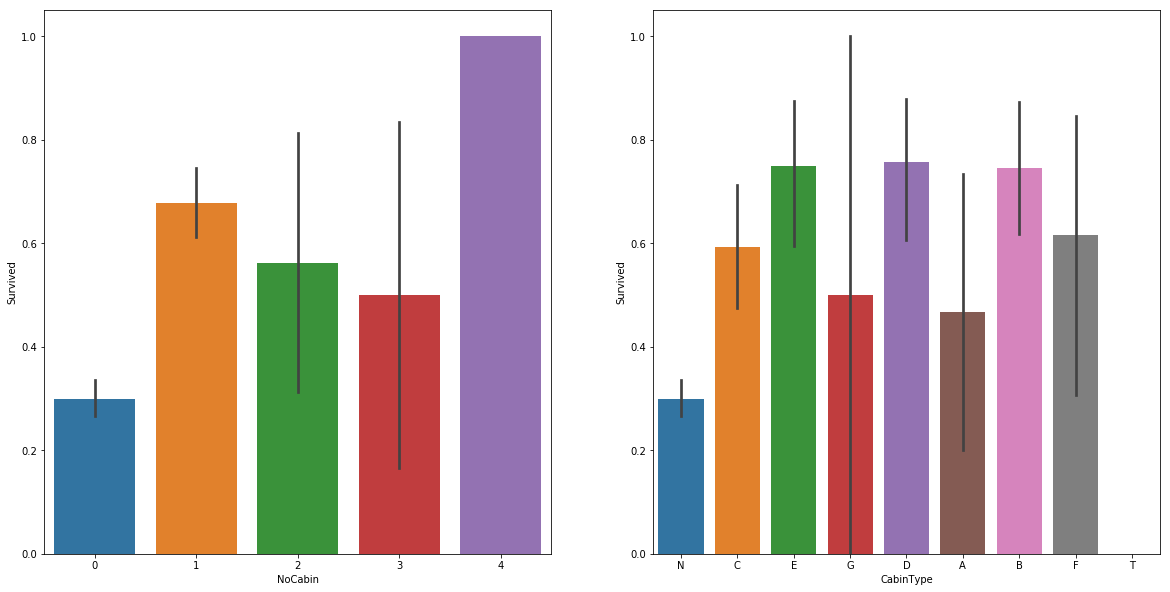

In [75]:
combine['CabinType'] = combine.Cabin.apply(lambda x: x[0])

def number_of_cabins(cabin):
    if cabin == 'N': return 0
    else: return len(cabin.split(' '))
    
combine['NoCabin'] = combine.Cabin.apply(lambda x: number_of_cabins(x))

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)

g1 = sns.factorplot('NoCabin', 'Survived', 
                    kind = 'bar', data = combine, ax = ax1)
plt.close(g1.fig)
g2 = sns.factorplot('CabinType', 'Survived', 
                    kind = 'bar', data = combine, ax = ax2)
plt.close(g2.fig)
plt.show()

As it turns out, passengers staying in cabins had a higher possibility of surviving, but the effect does not increase with the number of cabins. In fact, the higher number of cabins, the lower the probability of the passenger surviving. We can then convert this column to categorical instead of numerical to capture the asymmetric effects.

From the Cabin types, we note that passengers staying in the "E", "D", and "B" cabins had a higher survival rate. 

In [76]:
# Not very important to do
combine['NoCabin'] = pd.Categorical(combine.NoCabin)
print(combine.NoCabin.dtypes)

category


### Feature Selection

After all this, we can begin to select features which we believe are informative of the response variable. We typically do so using a heatmap/correlation plot.

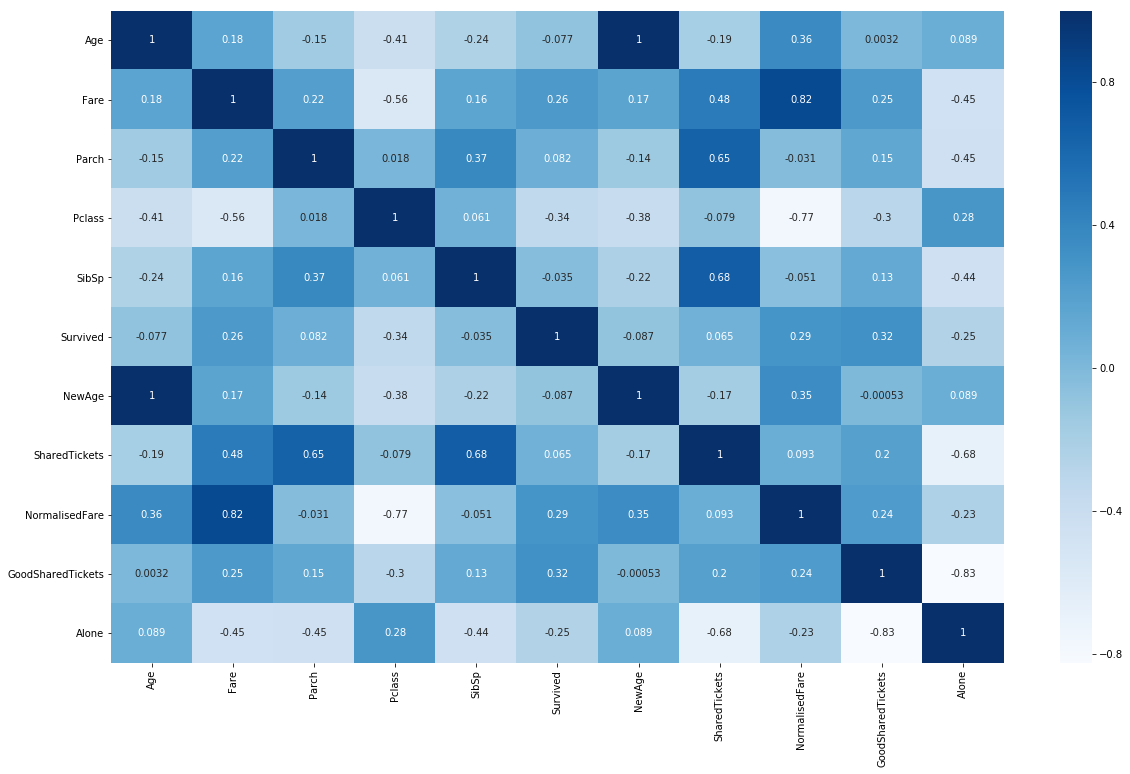

In [77]:
plt.figure(figsize=(20, 12))
sns.heatmap(combine.corr(), cmap='Blues', annot=True)
plt.show()

From the correlation plot, we note that the following features seem to be fairly highly correlated with the "Survived" feature:

1. NormalisedFare
2. GoodSharedTickets
3. NewAge
4. PassengerClass

In addition, we will include some other categorical features not included in the correlation plots:

1. Gender
2. CabinType
3. NoCabin
4. Designation

In [78]:
features = ['NormalisedFare', 'GoodSharedTickets', 'NewAge', 'Pclass', 'Alone',
            'Sex', 'CabinType', 'NoCabin', 'Designation']

X = combine[features]
y = combine['Survived']

### Developing a Machine Learning Algorithm

Noting that the problem we are currently dealing with is a categorical supervised learning problem, we can use the following techniques for prediction:

1. Random Forest
2. K-Nearest Neighbors

#### Training, Cross-Validation and Testing
Before we begin developing the models, it is important to split our training data into the following:

1. Training data
2. Cross-validation data

The training data will be used solely for the purpose of training our classifier, while the cross-validation data will be used to evaluate the performance of the model. Typically, the training-validation data split is 80-20, but depending on data availability and problem scope, it is appropriate to use a 70-30 or 90-10 split. For our case, we will be using a 90-10 split, as we are dealing with only 891 observations.

We will be using the performance on the cross-validation dataset as a metric for prediction on the test dataset. Why would we want to do that? As it turns out, as we increase the number of parameters in our model, our model becomes so complicated that it cannot be justified by the data (the model is **"memorizing"** the observations), and cannot generalise well to unseen data.

As a result, splitting the data into training and cross-validation helps to reduce the problem of overfitting, and helps improve generalizability and performance on previously unseen dataset.

---

##### Model 1: Random Forest Classifier
Recall that a random forest classifier is an ensemble of decision trees. This begs the question: What's a decision tree? Well, a decision tree is a classifier that makes decisions using decision rules. For example, suppose we are trying to predict whether or not someone is going to pass the final exams or not; we can use decision rules such as "If the subject scored more than 70 points for his mid-term", he is likely to pass the exam. Of course, this posits that we have data on his midterm. Then, the random forest classifier collects all these decision trees, with each decision tree splits on different features (based on what the classifier believes to be the best feature to split on). Then it passes the validation data through all these trees, and collects the result.

With that in mind, we can start creating our first Machine Learning model - a Random Forest classifier. We can easily do so in Python, using the following function: `from sklearn.ensemble import RandomForestClassifier`.

The classifier (you can find more information [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)) takes the following (and more) as inputs:

1. n_estimators - the number of decision trees, typically set to 500 or 1000
2. criterion - the function that measures the quality of the split to decide which variable/feature to split on
3. max_depth - maximum depth of the decision tree
4. max_features - the number of maximum features to consider when looking for the best split
5. min_samples_split - the minimum number of samples required to split an internal node
6. random_state - we set a random_state to ensure reproducibility

For our classifier, we will also be using the GridSearch technique - we iterate over possible hyperparameters and look for the best combination of parameters that yields the highest accuracy.

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

def label_coding(col):
    encoder = LabelEncoder()
    return encoder.fit_transform(col)

categorical_columns = ['Designation', 'Sex', 'CabinType']
for col in categorical_columns:
    newcolname = str(col)
    X[newcolname] = label_coding(X[col])

/Users/ngbolin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


891

In [87]:
# Splitting Training Data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

random_state = 42
X_train = X[:len(train)].copy(); y_train = y[:len(train)].copy()
X_test = X[len(train):].copy()

# Splitting into training and cross-validation dataset
X_subtrain, X_subtest, y_subtrain, y_subtest = train_test_split(X_train, y_train, 
                                                                test_size = 0.2,
                                                                random_state = random_state)

In [89]:
# Model 1: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

def random_forest(X_subtrain, y_subtrain):
    # Defining the classifier and its arguments
    rf = RandomForestClassifier(n_estimators = 1000,
                                criterion = 'gini',
                                min_samples_split=10,
                                random_state = random_state)
    
    param_grid = {'max_depth': [4, 5, 6]}
    rf_clf = GridSearchCV(rf, param_grid).fit(X_subtrain, y_subtrain)
    rf_score = cross_val_score(rf_clf, X_subtrain, y_subtrain, cv = 10).mean()
    return rf_clf, rf_score

rf_clf, rf_score = random_forest(X_subtrain, y_subtrain)
print(rf_score)

0.8329510395707578


Using cross-validation, we achieved an accuracy of 83.3% over 10-fold cross validation. What goes on under the hood?

<img src="images/cross-validation.png">

Python splits up the dataset into 10 different folds, and uses 9 of them for training the classifier. It then evaluates the classifier's performance on the tenth fold. It does this 10 different times, each time using a different fold for testing. The accuracy score we see is the average (mean) accuracy across 10 different iterations. This begs the question: How well does our model perform? To answer this, we can simply check the average survival rate in the data.

In [95]:
np.mean(combine.Survived)

0.3838383838383838

As it turns out, a simple model that predicts 0 (everyone perishes) for every observation would yield an accuracy score of 61.6%. However, our model had an accuracy of 83.3%, beating the simple baseline model by more than 20%.

---

##### Model 2: K-Nearest Neighbors

The next model that we are interested in is the k-Nearest Neighbors model. What exactly is it? The k-Nearest Neighbors algorithm is a non-parametric method that takes an observation as its input, and returns the output from the k different observations that are the most similar to (smallest distance from) the observation.

How do we judge distance? One way to do so is through the Euclidean distance metric. But what if there is reason to believe that for some categorical variables, there is no natural ordering i.e. Low - Medium - High? There are ways to circumvent this issue, but we will not be discussing those issues here. Instead, we sweep these questions under the rug (you can learn more about it [here](https://www.quora.com/How-can-I-use-KNN-for-mixed-data-categorical-and-numerical)), and proceed to encode our categorical variables.

To proceed with the algorithm, here are some steps we need to take:

1. Import the library and the corresponding functions that allow us to use the algorithm.
2. Choose K - typically, K is chosen to be an odd number, such as 5 or 7. We will use 5 in our case.
3. We scale our datasets; the K-Nearest Neighbors algorithm works best with scaled data.
4. We pass our data into the algorithm, and use that to predict for the validation data and verify it with the actual realisations.

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

def k_nearest_neighbors(X_subtrain, y_subtrain):
    # Scaling the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_subtrain)
    
    knn = KNeighborsClassifier()
    param_grid = {'n_neighbors': [3, 5, 7, 10],
                  'weights': ['uniform', 'distance']}
    knn_clf = GridSearchCV(knn, param_grid).fit(X_subtrain, y_subtrain)
    knn_score = cross_val_score(knn_clf, X_subtrain, y_subtrain, cv = 10).mean()
    return knn_clf, knn_score

knn_clf, knn_score = k_nearest_neighbors(X_subtrain, y_subtrain)
print(knn_score)

0.7261323496534764


It appears that the KNN model did not perform as well as the Random Forest classifier, since it only achieved an accuracy of 72.6%. Nonetheless, let's check the classifiers' performance on the validation dataset.

In [93]:
print(rf_clf.score(X_subtest, y_subtest))
print(knn_clf.score(X_subtest, y_subtest))

0.8156424581005587
0.7374301675977654


It turns out that our intuition was right - the Random Forest classifier did perform better on the validation dataset. 

Let's use the Random Forest classifier to predict for the testing dataset, and submit it to Kaggle and check how well we did.

In [100]:
submission.to_csv('submission1.csv', index=False)

In [109]:
def submissions():
    submission = pd.read_csv('data/titanic/gender_submission.csv')
    submission['Survived'] = [int(x) for x in rf_clf.predict(X_test)]
    submission.to_csv('data/titanic/submissions.csv', index=False)
    
submissions()

Our model did pretty well! Please feel free to improve on our baseline model.